In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams["font.family"] = "Open Sans"
matplotlib.rcParams["font.size"] = 10


"done"

'done'

In [110]:
# some setup
rmsd_type = "COMMON-P"

base_dirs = [ 
    f"../bPTC+peptides/RMSD-{rmsd_type}/",
    f"../bPTC/RMSD-{rmsd_type}/",
    f"../sPTC/RMSD-{rmsd_type}/",
    f"../sPTC+L2/RMSD-{rmsd_type}/",
    f"../sPTC+L3/RMSD-{rmsd_type}/",
    f"../sPTC+L4/RMSD-{rmsd_type}/",
    f"../sPTC+L234/RMSD-{rmsd_type}/",
]
n_dirs = len(base_dirs)
tids = [1, 2, 3]
n_tids = len(tids)

first_frame = 8000
last_frame = 11000


In [111]:
data_all = []

for dir_i in range(n_dirs):
    
    data_system = []
    
    for tid_i in range(n_tids):

        base_dir = base_dirs[dir_i]
        tid = tids[tid_i]

        # read data
        data = np.loadtxt(base_dir + f"rmsd{tid}.dat").T / 10 # convert to nm
        xs = np.arange(len(data)) / 10 # ns
        
        data_system.append(data[first_frame:last_frame])
        
    data_all.append(np.concatenate(data_system))

In [112]:
data_all

[array([0.17809, 0.18058, 0.18093, ..., 0.23244, 0.21962, 0.22091]),
 array([0.24157, 0.24514, 0.24037, ..., 0.33017, 0.34362, 0.31874]),
 array([0.4675 , 0.50988, 0.49826, ..., 0.55495, 0.53373, 0.52165]),
 array([0.46494, 0.44957, 0.43769, ..., 0.54392, 0.55126, 0.5814 ]),
 array([0.57823, 0.57837, 0.58632, ..., 0.35602, 0.36293, 0.34666]),
 array([0.38126, 0.40138, 0.38936, ..., 0.37214, 0.35546, 0.36248]),
 array([0.39878, 0.37985, 0.39488, ..., 0.3821 , 0.38135, 0.39445])]

In [113]:
labels = [base_dir.split("/")[1] for base_dir in base_dirs]
means = [np.mean(i) for i in data_all]
stds =  [np.std(i) for i in data_all]
errs = [np.std(i)/np.sqrt(len(i))*10 for i in data_all]
xs = np.arange(len(means))

<ErrorbarContainer object of 3 artists>

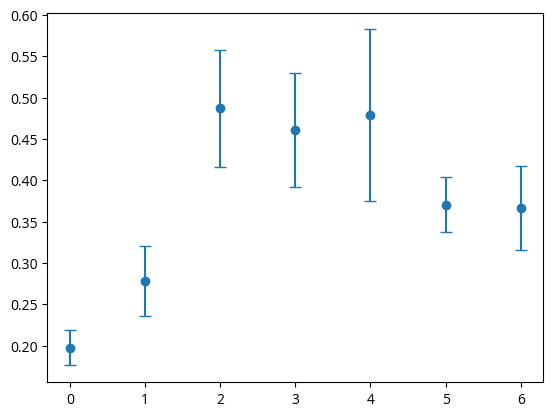

In [114]:
plt.errorbar(xs, means, yerr=stds, lw=0, elinewidth=1.5, capsize=4, marker="o")

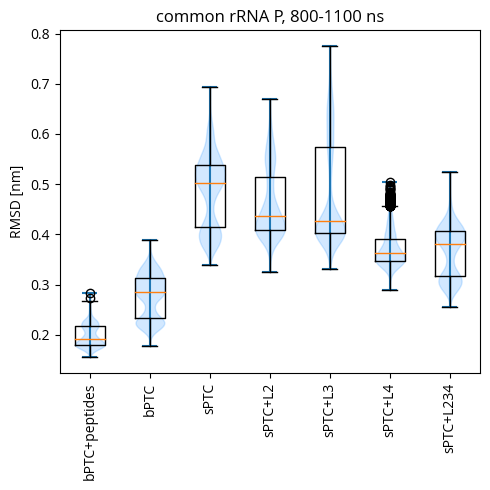

In [115]:
plt.figure(figsize=(5,5))
violins = plt.violinplot(data_all)
for v in violins["bodies"]:
    v.set_color("dodgerblue")
    v.set_alpha(0.2)
plt.boxplot(data_all, labels=labels)
plt.xticks(rotation=90)
plt.title(f"common rRNA P, {first_frame/10:.0f}-{last_frame/10:.0f} ns")
plt.ylabel("RMSD [nm]")

plt.tight_layout()
for ext in "png pdf".split():
    plt.savefig(f"../small-with-peptides.{ext}")